In [3]:
import sys
sys.path.append('../src')
from data_loading import *
from population_pyramid_helpers import *
from vehicle_type_helpers import *
from introduction_helpers import *
from map_france_helpers import *
from car_injuries_helpers import *
from security_equipments_helper import *
from weather_road_conditions_helpers import *
from stats_helpers import *

# Driving kills but can data help you survive

The goal of our data story will be to explore some key insights of the dataset by making a story about how to reduce your chance of dying in a road accident. By reading the story, the reader will be able to see what are the main factors of road accidents regarding different aspects about drivers (age, sexe, ..), places where accidents occurs (type of roads, departements, ..), moments when accidents occurs (during the year, month, day or with specific weather conditions) and security equipements (if the driver had its belt, the impact of security equipment on the gravity of the accident, ..).

At the end, the story will depict the "perfect" ride to avoid an accident by looking at the best possible case for each insight (the one having the less fatal accidents rate).

## Introduction

The demand for road transportation and the rate of motorization have continued to increase in all cities around the world. This increasing demand and the preference for private transport are at the root of many problems, among which road accidents. In fact, the number of accidents has continued to increase, with disastrous consequences. With our story, we aim to analyze the causes and effects of this phenomenon. 

We would like to investigate the correlation between the gravity level of a road accident and the components of the traffic system composed of the road, the driver and the vehicule. These components can be described by variables illustrating the drivers behavior, the attributes of the vehicle operated, the quality of the road and the climatic conditions. 

### Number of accidents

In 10 years, from 2008 to 2018, the number of accident per year lies between 57783 (in 2018) and 76767 (in 2008). The general trend is a decrease in the number of accident per year.

#### Accidents per years

From 2008 to 2012, we notice that the number of accidents per year has been reduced linearly by 25% and then stabilizing around 60000 accidents per year until 2018. 

In [4]:
df_accidents_per_year = get_number_accidents_per_years(2008, 2018)

In [5]:
df_accidents_per_year

2008    76767
2009    74409
2010    69379
2011    66974
2012    62250
2013    58397
2014    59854
2015    58654
2016    59432
2017    60701
2018    57783
dtype: int64

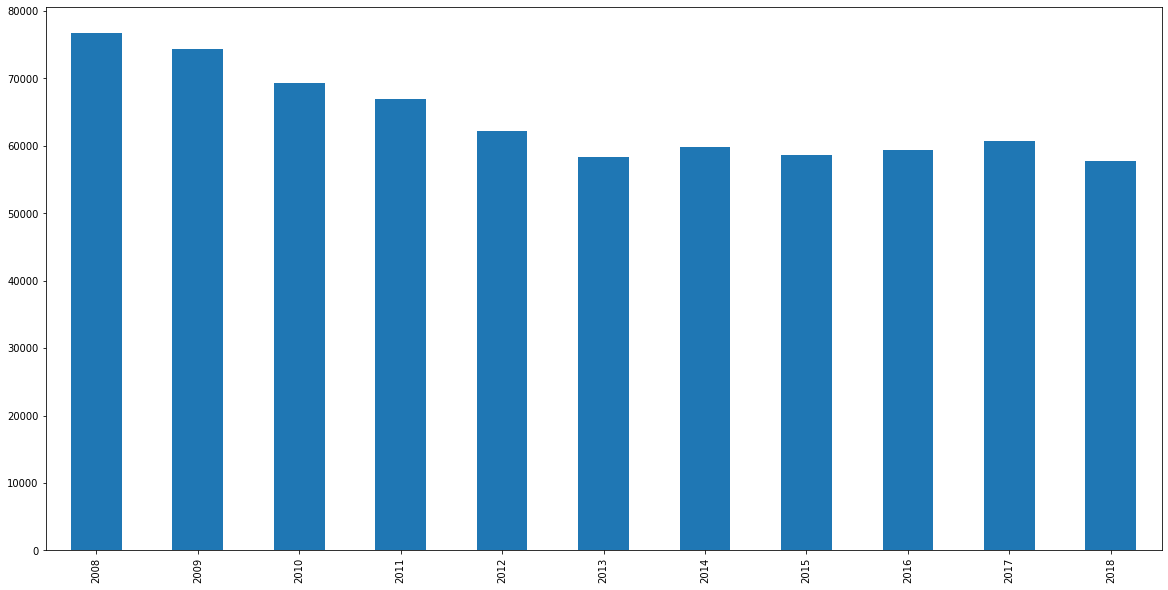

In [6]:
plot_number_accidents_per_years(df_accidents_per_year)

#### Accidents per months

We plotted the monthly distribution of accidents in the most recent year provided (2018). The number of accidents lays between 3458 accidents in February and 5698 accidents in October. Two main spikes can be noticed, one around the summer holidays (May to July) and one around the back-to-school period. Let us see if this trend is generalized over the years. 

In [7]:
year = 2018
data_2018 = YearLoader(year)

In [8]:
df_accidents_per_months_2018 = get_number_accidents_per_months(data_2018)

In [9]:
df_accidents_per_months_2018

Jan     4350
Feb     3458
Mar     4152
Apr     4833
May     5055
June    5579
July    5241
Aug     4336
Sept    5532
Oct     5698
Nov     4883
Dec     4666
dtype: int64

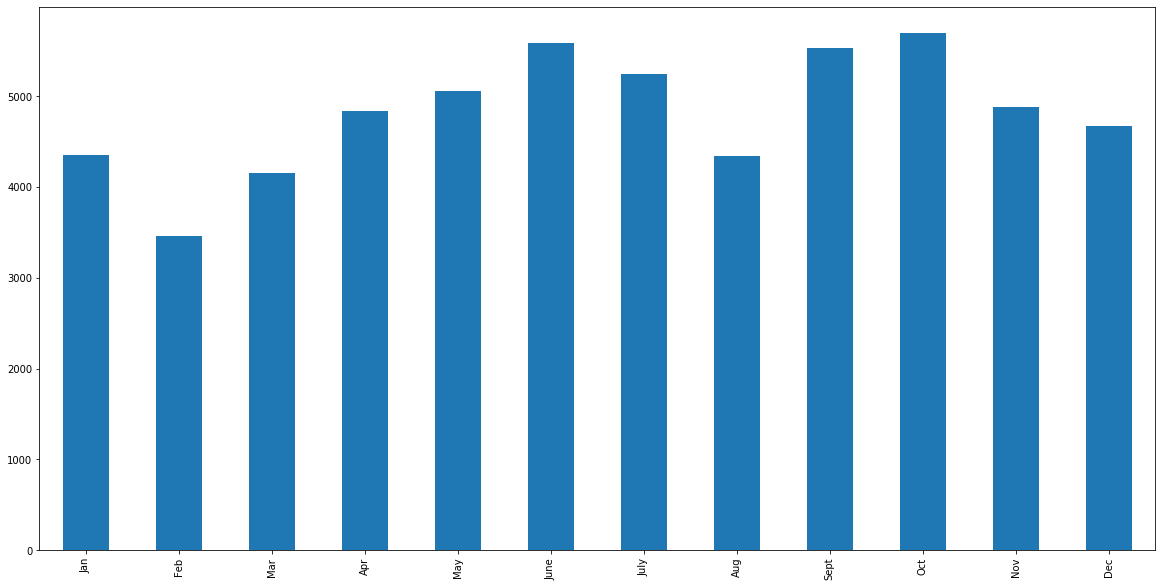

In [10]:
plot_number_accidents_per_months(df_accidents_per_months_2018)

We can also dig deeper and take into account the different months. Indeed the number of accidents vary and depends of the period of the year. On the following plot we can observe that some months like October, June or July have a high number of accidents while August and September are safer on average.

Some results were unexpected. In February for example, with the winter, we could have expected more accidents. In August, because of the holiday break and the departures, we could have expected more accidents.

### Evolution over the years

We notice that around the years, the above trend is repeated, with February being the month with the least accidents and October being the month with the most frequent ones.

In [11]:
df_all_accidents_per_months = get_number_accidents_per_months_all_years(2008, 2018)

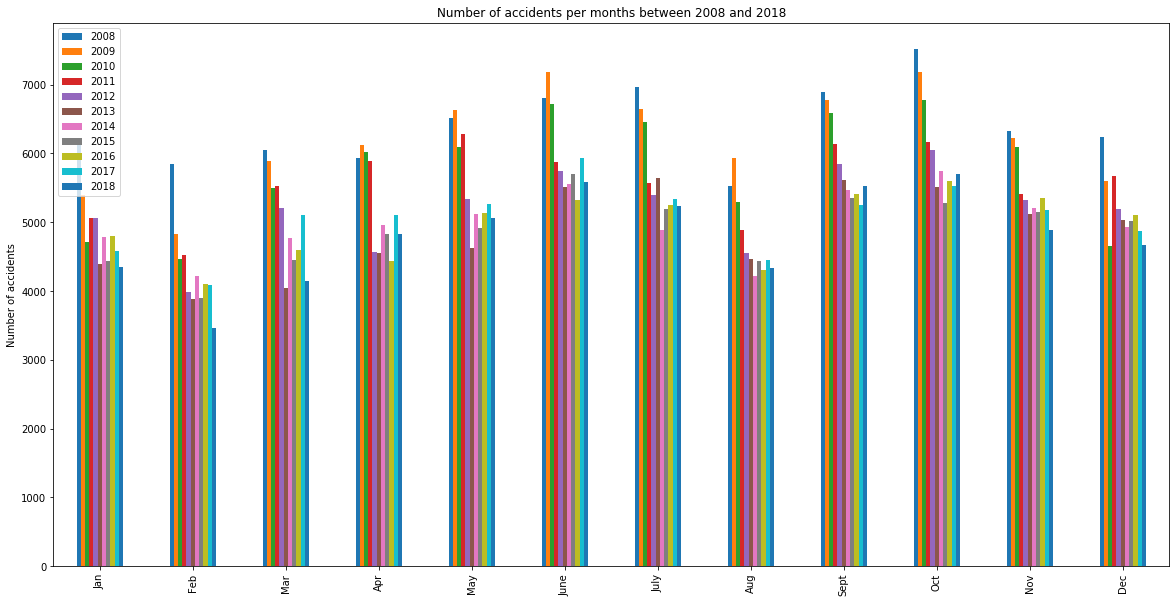

In [12]:
plot_all_years_accidents_per_months(df_all_accidents_per_months)

### Accidents gravity

The gravity of accidents is measured according to the level of damage done on humans (no damage (unscathed), slightly injured, injured, dead). The number of accidents in each class is inversely proportional to the level of damage (there are much more accidents where there has been no damage (around 60000 accidents/year) than the number of accidents where death has occurred (around 4000 accidents). The number of accidents related to death has been stable over the years. In the other classes (no damage and injury), the number of accidents follow the same trend : a clear decrease from 2008 to 2013, then a slight increase until 2018.

In [13]:
df_all_years_accidents_gravity = get_accidents_gravity_all_years(2008, 2018)

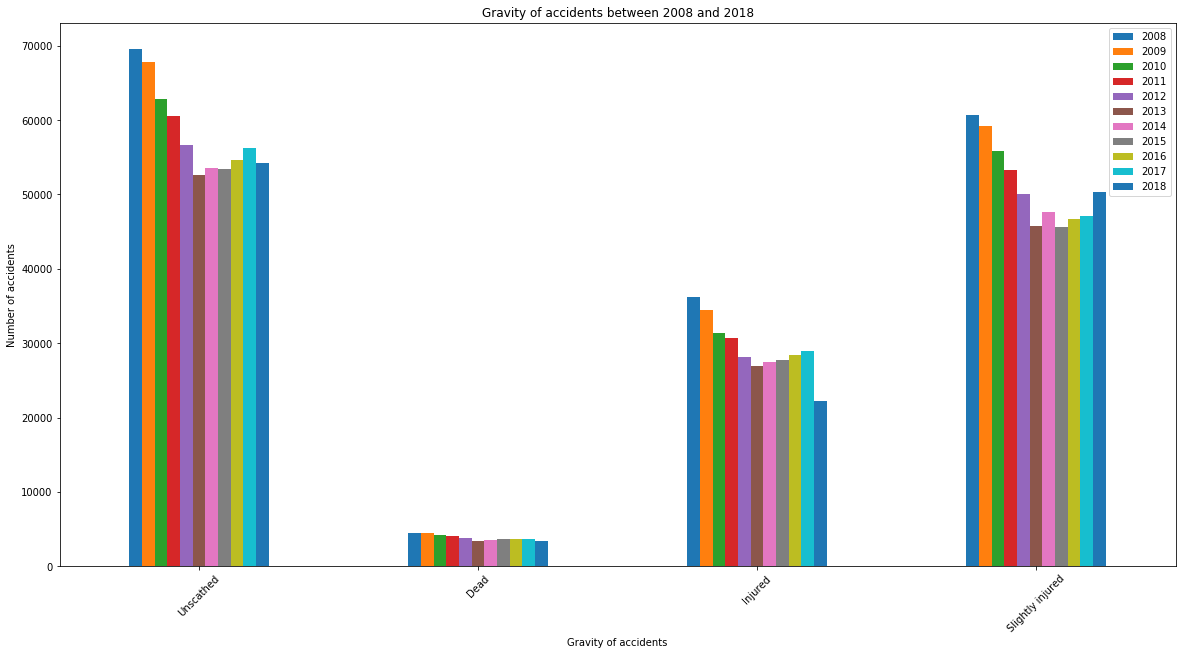

In [14]:
plot_all_years_accidents_gravity(df_all_years_accidents_gravity)

### Number of people per accidents

In [15]:
df_people_per_accidents_all = get_number_people_per_accidents_all_years(2008, 2018)

In [16]:
df_people_per_accidents_all.describe()

count    76767.000000
mean         2.226999
std          1.182808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         58.000000
Name: Num_Acc, dtype: float64

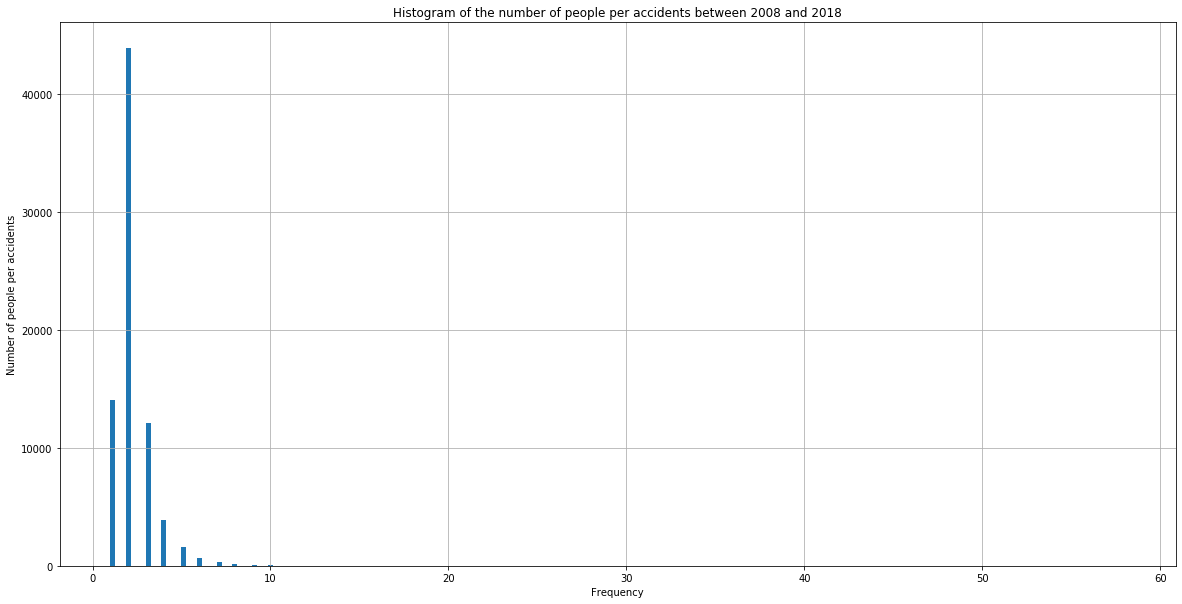

In [17]:
plot_number_people_per_accidents(df_people_per_accidents_all, multiple_years=True)

As the upper graph shows, most of the accidents involve less than 4 people. Indeed, most of the time people take the car alone, such as to get to work. As a result, accidents involve few people in average and most of the time, only one vehicle.

## 1. Be the right person ..

In this part, we were curious to know if gender and age have an impact on the road accidents and on their gravities. In our dataset, we could not differentiate between the passengers and the drivers, but still we could get an indication of the consequences of accidents on people.

In [18]:
data_2018 = YearLoader(2018)
data_dead_alive = get_dead_alive_gender_df(data_2018)

data_dead_alive

,age_group,male_dead,male_alive,female_dead,female_alive
0,00-10,34,2283,25,1695
1,10-20,201,9258,59,4614
2,20-30,582,21350,116,9552
3,30-40,395,16570,77,6990
4,40-50,361,13621,67,5832
5,50-60,364,11273,73,5177
6,60-70,261,6086,92,3514
7,70-80,196,3238,103,2281
8,80-90,174,1636,136,1312
9,90-100,46,260,29,197


### Population Pyramids

As an example, population pyramids for year 2018 :

The men and woman pyramid shows that the 20-30 years old are the people that are the most prone to be involved in accidents. 70% of the whole population involved in accidents are male. 3% of the male population dies in these accidents. The female pyramid shows two spikes in the number of dead women : 15% of the overall dead women at 20-30 years old and another 15% at 80-90 years old. 

Male population pyramid (dead vs alive)

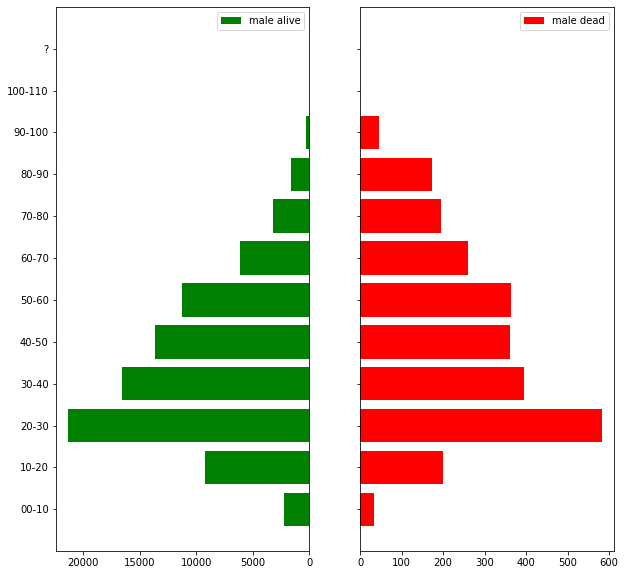

In [19]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=True, figsize=(10,10), xlim = None)

Female drivers population pyramid (dead vs alive)

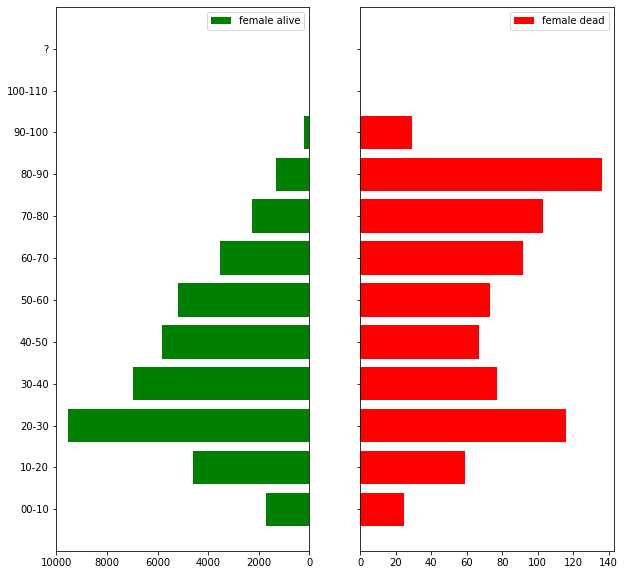

In [20]:
plot_pyramid_dead_alive_gender(data_dead_alive, male=False, female=True, figsize=(10,10), xlim = None)

Normalized pyramids (alive vs dead)

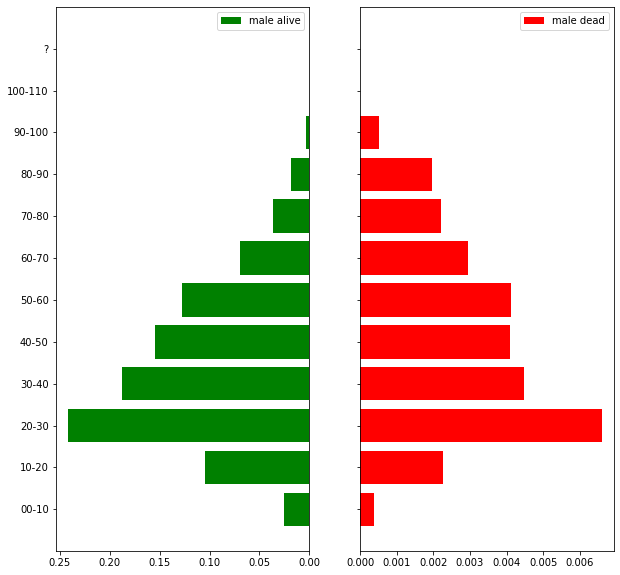

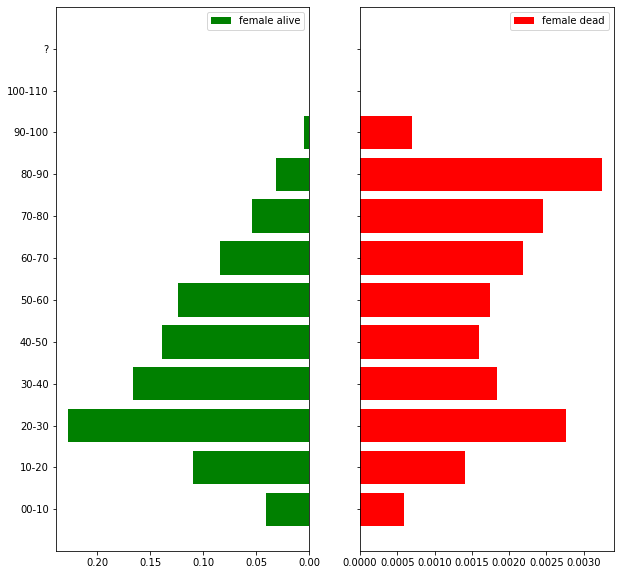

In [21]:
pyramid_data = data_dead_alive
plot_norm_pyramid_dead_alive_gender(data_dead_alive, male=True, female=True, xlim= None)

The age of a person influences both the probability to be in an accident and to die within. For the men, both probabilities decrease with age. The men and women pyramid shows that the 20-30 years old are the people that are the most prone to be involved in accidents and to die in an accident. For the women the number of death increase after 50 years, which can be due to the vulnerability of people at this age.

In [22]:
data = YearLoader(2018).get_dataframe("passengers")

gender_stats = ChiSquare(data['sexe'],data['grav'])

contingency_table :-
 grav      1     2      3      4
sexe                           
1     39028  2615  15487  31088
2     15220   777   6682  19272
Observed Values :-
 [[39028  2615 15487 31088]
 [15220   777  6682 19272]]
Expected Values :-
 [[36764.89843204  2298.82273045 15024.35174273 34129.92709478]
 [17483.10156796  1093.17726955  7144.64825727 16230.07290522]]
Degree of Freedom:- 1
chi-square statistic:- 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


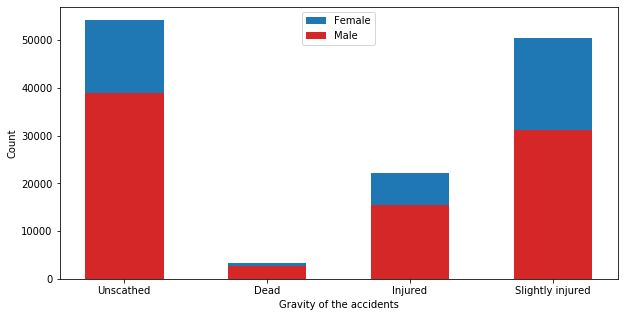

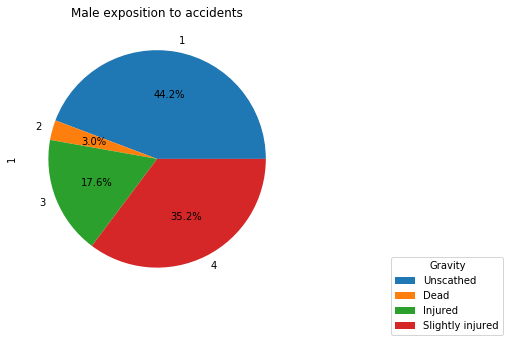

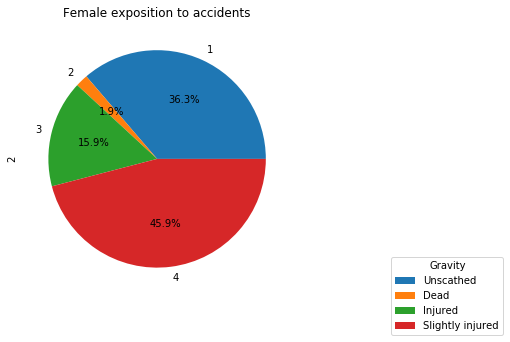

In [23]:
plot_gender_vs_gravity_contingency(data_2018)

On another hand, looking at the risks of injuries, we notice that even though there are more men exposed to accidents than women, there are less women that end up completely safe compared to men, and there are more risks of injuries as a woman than as a man (62% of chance to be injured as a woman versus 53% as a man).

### Types of vehicles

The graph distribution of vehicule types shows that the car is the vehicule where most accidents occur since 90% of the vehicules involved in accidents are cars. It is followed by the motorcycle with around 8% of overall number of vehicules.

In [24]:
data_vehicles = get_vehicles_type_df(data_2018, 8)

vehicles repartition over categories:

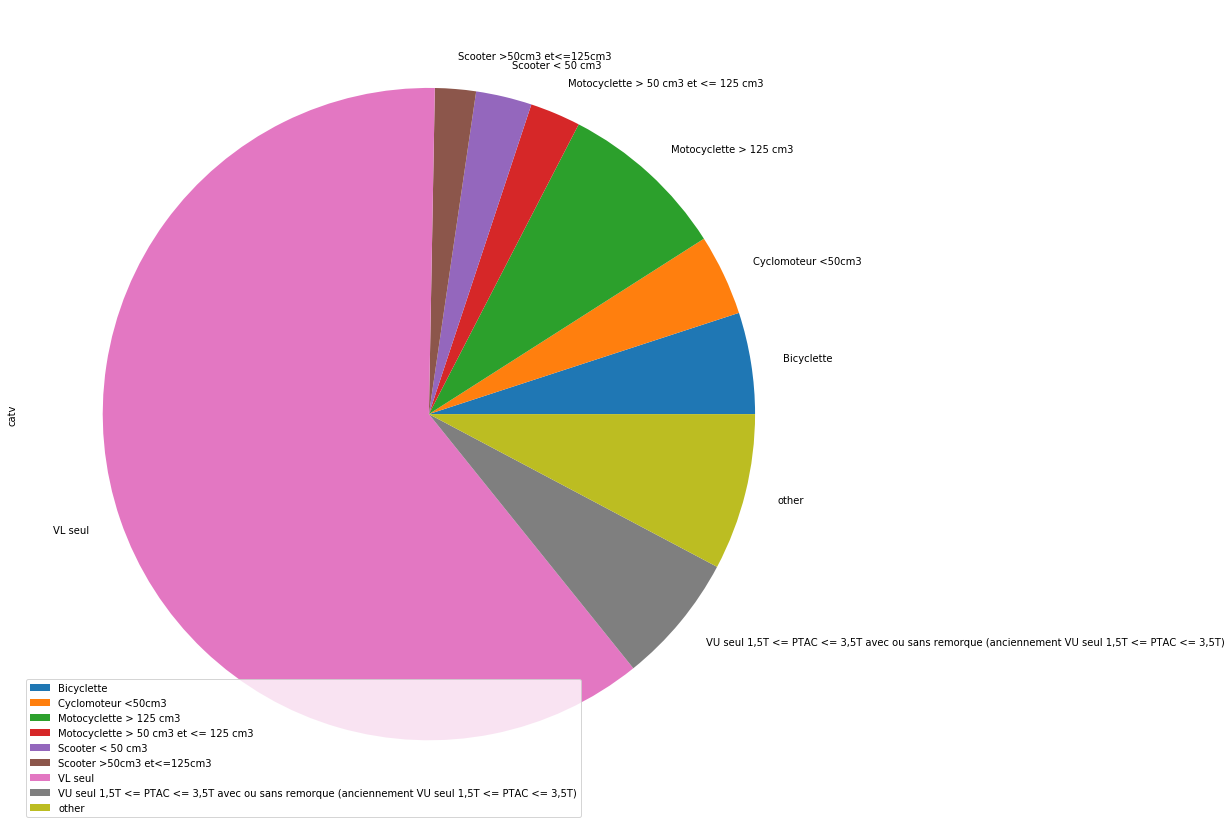

In [25]:
plot_vehicles_cat(data_vehicles, (15,15))

## 2. At the right place ..

### Accidents per regions/departments (map of France)

From this map, we observe that the French departments with the highest number of accidents are located where big cities are, where the population density is the biggest, for example around Paris and Marseille.

In [26]:
get_dep_count_df(data_2018)

,dep,count
0,75,5591
1,13,3413
2,93,2735
3,94,2548
4,92,2520
...,...,...
95,09,90
96,48,76
97,46,75
98,23,61


The map of france displaying accidents per departments is interactive

![SegmentLocal](map_france.gif "segment")

### Injury visualization in the car (Heatmap from the car top -> data story milestone)

Car place number:
![car place](car.jpg)

All injuries :

In [27]:
get_car_injuries_df(data_2018, dead_only=False)

,place
1.0,96011
2.0,14465
3.0,2475
4.0,2049
9.0,1435
7.0,1297
8.0,688
5.0,610
6.0,179


Death only:

In [28]:
get_car_injuries_df(data_2018, dead_only=True)

,place
1.0,2411
2.0,318
9.0,37
7.0,34
4.0,33
3.0,29
8.0,14
5.0,7
6.0,1


## 3. At the right moment ..

### Weather conditions

Accidents and percentage of the accidents given the weather for all year between 2008 and 2018

Most accidents happen during normal weather conditions (80%) and 10% happen during light rainfall surprisingly. This could be due to the fact that during good weather conditions, the driver is less focused on the road than when the weather conditions are bad, also the speed of the cars is greater in normal weather conditions which leads to a greater risk of accidents. For a deeper analysis, this graph should be weighted with the frequency of the weather condition during the year.

Looking at the percentage of killed people, the worst case would be driving under fog.

In [29]:
get_accident_per_weather_years(list(range(2008, 2019)))

,accidents,perc
weather,,
Normal,568065,80.630693
Light rainfall,74927,10.635079
Heavy rainfall,15767,2.237955
Snow - hail,4134,0.586777
Fog - smoke,4531,0.643127
Strong wind - storm,1680,0.238458
Dazzling weather,7787,1.105281
Covered weather,22697,3.221594
Other,4939,0.701038


Impact of the weather on the gravity of the accidents

In [30]:
grav_weather_over_years(list(range(2008, 2019)))

counts       perc
atm                 grav                                       
Normal              Unharmed                  521212  41.197840
                    Killed                     32855   2.596938
                    Injured and hospitalized  257930  20.387403
                    Slightly injured          453147  35.817820
Light rainfall      Unharmed                   65647  40.003047
                    Killed                      3753   2.286950
                    Injured and hospitalized   30620  18.658786
                    Slightly injured           64085  39.051217
Heavy rainfall      Unharmed                   14039  39.364625
                    Killed                      1108   3.106774
                    Injured and hospitalized    7783  21.823127
                    Slightly injured           12734  35.705473
Snow - hail         Unharmed                    4241  41.738018
                    Killed                       332   3.267395
                    Injured and hospitalized    2257  22.212381
                    Slightly injured            3331  32.782206
Fog - smoke         Unharmed                    3966  36.817675
                    Killed                       701   6.507612
                    Injured and hospitalized    3283  30.477163
                    Slightly injured            2822  26.197549
Strong wind - storm Unharmed                    1274  35.556796
                    Killed                       213   5.944739
                    Injured and hospitalized    1034  28.858498
                    Slightly injured            1062  29.639967
Dazzling weather    Unharmed                    7730  42.906306
                    Killed                       823   4.568162
                    Injured and hospitalized    5211  28.924290
                    Slightly injured            4252  23.601243
Covered weather     Unharmed                   20100  39.474459
                    Killed                      1953   3.835503
                    Injured and hospitalized   11441  22.469019
                    Slightly injured           17425  34.221018
Other               Unharmed                    3783  35.547829
                    Killed                       510   4.792332
                    Injured and hospitalized    2821  26.508175
                    Slightly injured            3528  33.151663

In [32]:
years = list(range(2008, 2019)) # All years

data = stats_df_weather_gravity(years)

Chi_square_gravity_vs_seatbelt = ChiSquare(data['atm'],data['grav'])

contingency_table :-
 grav       1      2       3       4
atm                                
1     521212  32855  257930  453147
2      65647   3753   30620   64085
3      14039   1108    7783   12734
4       4241    332    2257    3331
5       3966    701    3283    2822
6       1274    213    1034    1062
7       7730    823    5211    4252
8      20100   1953   11441   17425
9       3783    510    2821    3528
Observed Values :-
 [[521212  32855 257930 453147]
 [ 65647   3753  30620  64085]
 [ 14039   1108   7783  12734]
 [  4241    332   2257   3331]
 [  3966    701   3283   2822]
 [  1274    213   1034   1062]
 [  7730    823   5211   4252]
 [ 20100   1953  11441  17425]
 [  3783    510   2821   3528]]
Expected Values :-
 [[5.17660434e+05 3.40660289e+04 2.59946184e+05 4.53471353e+05]
 [6.71470327e+04 4.41879001e+03 3.37182712e+04 5.88209061e+04]
 [1.45926801e+04 9.60310332e+02 7.32779882e+03 1.27832107e+04]
 [4.15758812e+03 2.73601202e+02 2.08775695e+03 3.64205372e+03]
 [4.407591

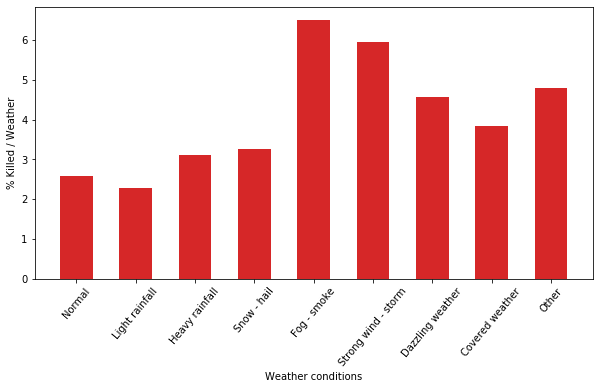

In [33]:
plot_weather_vs_gravity_contingency()

We showed previously that the number of accident varies during the year. This may be due to the weather that also impacts the road conditions. We showed that while driving, the worst conditions are fog, strong winds and dazzling weather, when the visibility on the road is the less. The weather condition with the least percentage of death per accident is during light rainfall. Even with heavy rainfall, this percentage is just above normal conditions. In these conditions, people tend to be more careful.

### Road conditions

Accidents and percentage of the accidents given the road conditions for all year between 2008 and 2018

The observations of the above graph match the road condition graphs. During the worst visible weather conditions more lethal accidents occures.

In [34]:
get_accident_per_road_conditions_years(list(range(2008, 2019)))

,accidents,perc
surface,,
Normal,544611,77.505280
Wet,121543,17.297161
Puddles,1111,0.158110
Flooded,410,0.058348
Snowy,2028,0.288611
Muddy,388,0.055217
Icy,4381,0.623474
Greasy substance - oil,1658,0.235955
Other,26546,3.777844


Impact of the road conditions on the gravity of the accidents

In [35]:
grav_surface_over_years(list(range(2008, 2019)))

counts       perc
surf                   grav                                         
Flooded                Injured and hospitalized     230.0  25.302530
                       Killed                        64.0   7.040704
                       Slightly injured             286.0  31.463146
                       Unharmed                     329.0  36.193619
Greasy substance - oil Injured and hospitalized     712.0  23.451910
                       Killed                        83.0   2.733860
                       Slightly injured            1471.0  48.451910
                       Unharmed                     770.0  25.362319
Icy                    Injured and hospitalized    2747.0  29.477412
                       Killed                       452.0   4.850306
                       Slightly injured            3086.0  33.115141
                       Unharmed                    3034.0  32.557141
Muddy                  Injured and hospitalized     263.0  38.506589
                       Killed                        35.0   5.124451
                       Slightly injured             200.0  29.282577
                       Unharmed                     185.0  27.086384
Normal                 Injured and hospitalized  250630.0  20.540193
                       Killed                     32375.0   2.653269
                       Slightly injured          431205.0  35.339082
                       Unharmed                  505983.0  41.467456
Other                  Injured and hospitalized   11255.0  20.622618
                       Killed                      1190.0   2.180446
                       Slightly injured           20795.0  38.102829
                       Unharmed                   21336.0  39.094107
Puddles                Injured and hospitalized     620.0  29.779059
                       Killed                         NaN        NaN
                       Slightly injured             771.0  37.031700
                       Unharmed                     691.0  33.189241
Snowy                  Injured and hospitalized    1112.0  21.846758
                       Killed                       169.0   3.320236
                       Slightly injured            1665.0  32.711198
                       Unharmed                    2144.0  42.121807
Wet                    Injured and hospitalized   53660.0  19.964952
                       Killed                      7718.0   2.871590
                       Slightly injured          101690.0  37.835183
                       Unharmed                  105703.0  39.328276

## 4. And keep it secure

Since less data was collected on people not wearing a seatbelt, we cannot compare these tabs horizontally. Considering that the ratio of people in each class over the whole population is the same for both plots, we can say that the proportion of killed people is decrease by 17% when a seatbelt is worn and the proportion of injured and hospitalized people is decrease by 20%. 
Considering the motorcycles equipment, wearing a helmet prevents death and injury decreasing the proportion of death by 4% and that of injury by 12%.
Considering the reflective devices, having one prevents death and injury decreasing the proportion of death by 6% and that of injury by 20%.

### Security equipment usage
#### Presence of seatbelt

In [36]:
code_seatbelt    = [11] # Seatbelt attached
code_no_seatbelt = [12] # No setbelt
years = list(range(2008, 2019)) # All years

In [37]:
get_gravity_over_years(code_seatbelt, years)

,counts,perc
grav,,
Unharmed,506165,57.268007
Killed,15951,1.804712
Injured and hospitalized,119810,13.555422
Slightly injured,241927,27.371859


In [38]:
get_gravity_over_years(code_no_seatbelt, years)

,counts,perc
grav,,
Unharmed,5828,24.080654
Killed,4534,18.733989
Injured and hospitalized,8324,34.393852
Slightly injured,5516,22.791505


In [39]:
data = stats_df_security_gravity([11,12],years)

Chi_square_gravity_vs_seatbelt = ChiSquare(data['secu'],data['grav'])

contingency_table :-
 grav      1     2      3      4
secu                           
11    52995  1686  13075  24615
12      721   543   1054    638
Observed Values :-
 [[52995  1686 13075 24615]
 [  721   543  1054   638]]
Expected Values :-
 [[52050.31770642  2159.88082075 13690.87308947 24469.92838335]
 [ 1665.68229358    69.11917925   438.12691053   783.07161665]]
Degree of Freedom:- 1
chi-square statistic:- 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3905.811786814595
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


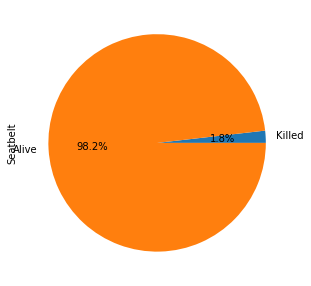

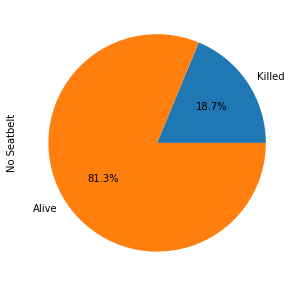

In [40]:
plot_seatbelt_vs_gravity_contingency()

More than **18%** killed when the seatbelt is not attached

#### Presence of helmet

In [41]:
code_helmet    = [21]
code_no_helmet = [22]

In [42]:
get_gravity_over_years(code_helmet, years)

,counts,perc
grav,,
Unharmed,25085,8.709888
Killed,9777,3.394721
Injured and hospitalized,100725,34.973230
Slightly injured,152419,52.922161


In [43]:
get_gravity_over_years(code_no_helmet, years)

,counts,perc
grav,,
Unharmed,1001,5.998322
Killed,1203,7.208773
Injured and hospitalized,7777,46.602349
Slightly injured,6707,40.190556


More killed and hospitalized passengers when the helmet was not present

#### Presence of reflective device

In [44]:
code_refl_dev    = [41]
code_no_refl_dev = [42]

In [45]:
get_gravity_over_years(code_refl_dev, years)

,counts,perc
grav,,
Unharmed,334,16.065416
Killed,112,5.387205
Injured and hospitalized,597,28.715729
Slightly injured,1036,49.831650


In [46]:
get_gravity_over_years(code_no_refl_dev, years)

,counts,perc
grav,,
Unharmed,75,4.564820
Killed,191,11.625076
Injured and hospitalized,740,45.039562
Slightly injured,637,38.770542


**+6%** killed and almost **+20%** hospitalized when there was no relfective device

## Conclusion

Using our data analysis, we can draw the perfect portail and setting for Mr Y and Mrs X in order for them to drive safely across France. Mr Y is between 20 and 50, and Mrs X is between 30 and 50. Mrs X is driving, and Mr Y is sitting next to her on the front seat, both wearing their seatbelts. They are cruising in the middle of France in the middle of nowhere, avoiding any big city. It is a little bit cloudy and it might rain lightly. In this case, being the best case scenario, we can affirm that they still have 1% of chance of dying in an accident.